<a href="https://colab.research.google.com/github/realalyeasin/Deep-Learning/blob/main/ImageClassification_Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 1s 0us/step


In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


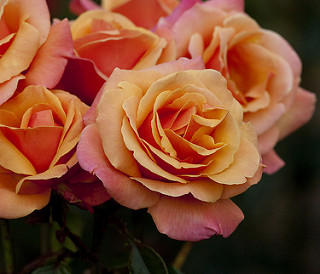

In [6]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[3]))

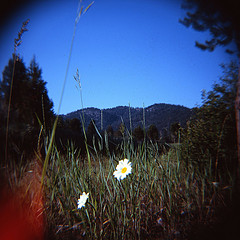

In [7]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[4]))

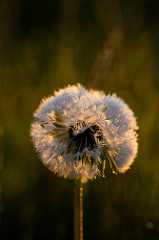

In [9]:
dandelion = list(data_dir.glob('dandelion/*'))
PIL.Image.open(str(dandelion[6]))

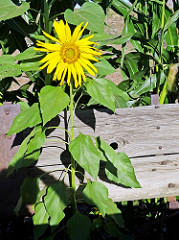

In [10]:
sunflowers = list(data_dir.glob('sunflowers/*'))
PIL.Image.open(str(sunflowers[16]))

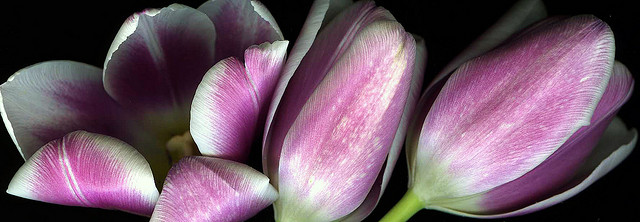

In [13]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[6]))

In [14]:
batch_size = 32
img_height = 180
img_width = 180

In [16]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [17]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [18]:
class_names = train_ds.class_names

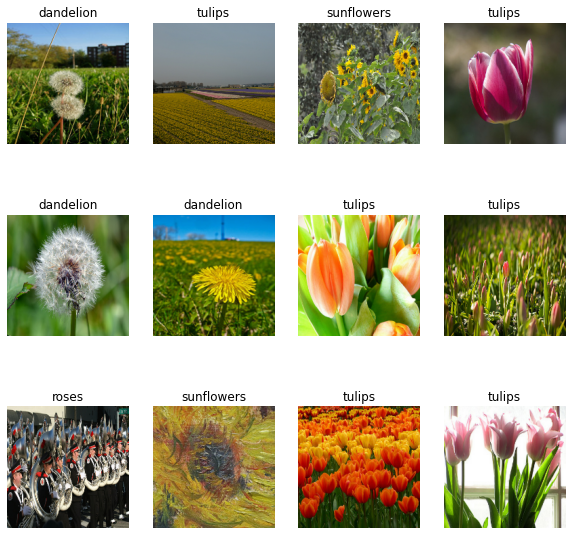

In [26]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [27]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [30]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [31]:
normalization_layer = layers.Rescaling(1./255)

In [32]:
normalized_ds = train_ds.map(lambda x, y : (normalization_layer(x),y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 0.99925935


Building The Model

In [33]:
num_classes = len(class_names)

model = Sequential([
                    layers.Rescaling(1./255, input_shape=(img_height,img_width, 3)),
                    layers.Conv2D(16,3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32,3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64,3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes)
])

Compiling The Model

In [36]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

Training The Model

In [38]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 99s 1s/step - loss: 1.3679 - accuracy: 0.4220 - val_loss: 1.1114 - val_accuracy: 0.5695
Epoch 2/10
92/92 [==============================] - 95s 1s/step - loss: 1.0268 - accuracy: 0.5984 - val_loss: 0.9988 - val_accuracy: 0.5872
Epoch 3/10
92/92 [==============================] - 97s 1s/step - loss: 0.8410 - accuracy: 0.6754 - val_loss: 1.0410 - val_accuracy: 0.5722
Epoch 4/10
92/92 [==============================] - 98s 1s/step - loss: 0.6514 - accuracy: 0.7520 - val_loss: 0.9601 - val_accuracy: 0.6526
Epoch 5/10
92/92 [==============================] - 98s 1s/step - loss: 0.4161 - accuracy: 0.8549 - val_loss: 0.9728 - val_accuracy: 0.6553
Epoch 6/10
92/92 [==============================] - 98s 1s/step - loss: 0.2768 - accuracy: 0.9016 - val_loss: 1.2340 - val_accuracy: 0.6417
Epoch 7/10
92/92 [==============================] - 97s 1s/step - loss: 0.1661 - accuracy: 0.9547 - val_loss: 1.2171 - val_accuracy: 0.6689
Epoch 8/10
92/92 [==